In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%ls
%cd drive/
%ls
%cd My\ Drive
%ls
%cd MLDA/
%ls

Mounted at /content/drive
drive/  sample_data/
/content/drive
MyDrive/
/content/drive/My Drive
 cardata.csv   CATS_DOGS/          MLDA/            'SVM classifier'/   Untitled2.ipynb
 CAT_00/      'Colab Notebooks'/   ML.ipynb          Untitled0.ipynb    Weather/
 CAT_00.zip    data/              'NN classifier'/   Untitled1.ipynb    WeatherRNN/
/content/drive/My Drive/MLDA
Untitled0.ipynb  untitled_project/  weather_prediction_dataset.csv


In [ ]:
# Import

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

In [ ]:
df = pd.read_csv('weather_prediction_dataset.csv')
print(df.shape)

(3654, 165)


In [ ]:
df.head(5)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [ ]:
df.tail(5)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9
3653,20100101,1,8,0.93,0.9965,0.08,0.56,0.0,2.9,-0.2,...,-8.8,-7.0,3.4,0.86,1.0040,0.11,0.00,0.5,-0.7,1.8


In [ ]:
print(df.describe())

               DATE        MONTH  BASEL_cloud_cover  BASEL_humidity  \
count  3.654000e+03  3654.000000        3654.000000     3654.000000   
mean   2.004568e+07     6.520799           5.418446        0.745107   
std    2.874287e+04     3.450083           2.325497        0.107788   
min    2.000010e+07     1.000000           0.000000        0.380000   
25%    2.002070e+07     4.000000           4.000000        0.670000   
50%    2.004567e+07     7.000000           6.000000        0.760000   
75%    2.007070e+07    10.000000           7.000000        0.830000   
max    2.010010e+07    12.000000           8.000000        0.980000   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
count     3654.000000             3654.000000          3654.000000   
mean         1.017876                1.330380             0.234849   
std          0.007962                0.935348             0.536267   
min          0.985600                0.050000             0.000000   
25%       

In [ ]:
df.count()

,0
DATE,3654
MONTH,3654
BASEL_cloud_cover,3654
BASEL_humidity,3654
BASEL_pressure,3654
...,...
TOURS_global_radiation,3654
TOURS_precipitation,3654
TOURS_temp_mean,3654
TOURS_temp_min,3654


In [ ]:
print(df.isnull().sum())

DATE                      0
MONTH                     0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
                         ..
TOURS_global_radiation    0
TOURS_precipitation       0
TOURS_temp_mean           0
TOURS_temp_min            0
TOURS_temp_max            0
Length: 165, dtype: int64


In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 165)


In [ ]:
print(df.dtypes)

DATE                        int64
MONTH                       int64
BASEL_cloud_cover           int64
BASEL_humidity            float64
BASEL_pressure            float64
                           ...   
TOURS_global_radiation    float64
TOURS_precipitation       float64
TOURS_temp_mean           float64
TOURS_temp_min            float64
TOURS_temp_max            float64
Length: 165, dtype: object


In [ ]:
# Filter columns for Heathrow
heathrow_columns = [col for col in df.columns if 'HEATHROW' in col]
heathrow_columns.insert(0, 'DATE')
df_heathrow = df[heathrow_columns]

print(df_heathrow.head())

       DATE  HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
0  20000101                     7               0.94             1.0245   
1  20000102                     7               0.89             1.0253   
2  20000103                     8               0.91             1.0186   
3  20000104                     5               0.89             1.0148   
4  20000105                     5               0.85             1.0142   

   HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_sunshine  \
0                       0.18                    0.00                0.4   
1                       0.20                    0.02                0.7   
2                       0.13                    0.60                0.0   
3                       0.34                    0.02                2.9   
4                       0.25                    0.08                1.3   

   HEATHROW_temp_mean  HEATHROW_temp_min  HEATHROW_temp_max  
0                 7.0               

                               DATE  HEATHROW_cloud_cover  HEATHROW_humidity  \
DATE                       1.000000             -0.159013           0.019188   
HEATHROW_cloud_cover      -0.159013              1.000000           0.482889   
HEATHROW_humidity          0.019188              0.482889           1.000000   
HEATHROW_pressure          0.009978             -0.242226          -0.220327   
HEATHROW_global_radiation -0.035228             -0.475238          -0.768943   
HEATHROW_precipitation    -0.022734              0.265594           0.330463   
HEATHROW_sunshine         -0.056684             -0.736670          -0.731628   
HEATHROW_temp_mean         0.006624             -0.074103          -0.444157   
HEATHROW_temp_min         -0.006252              0.081628          -0.312486   
HEATHROW_temp_max          0.014794             -0.188899          -0.506759   

                           HEATHROW_pressure  HEATHROW_global_radiation  \
DATE                                0.009978

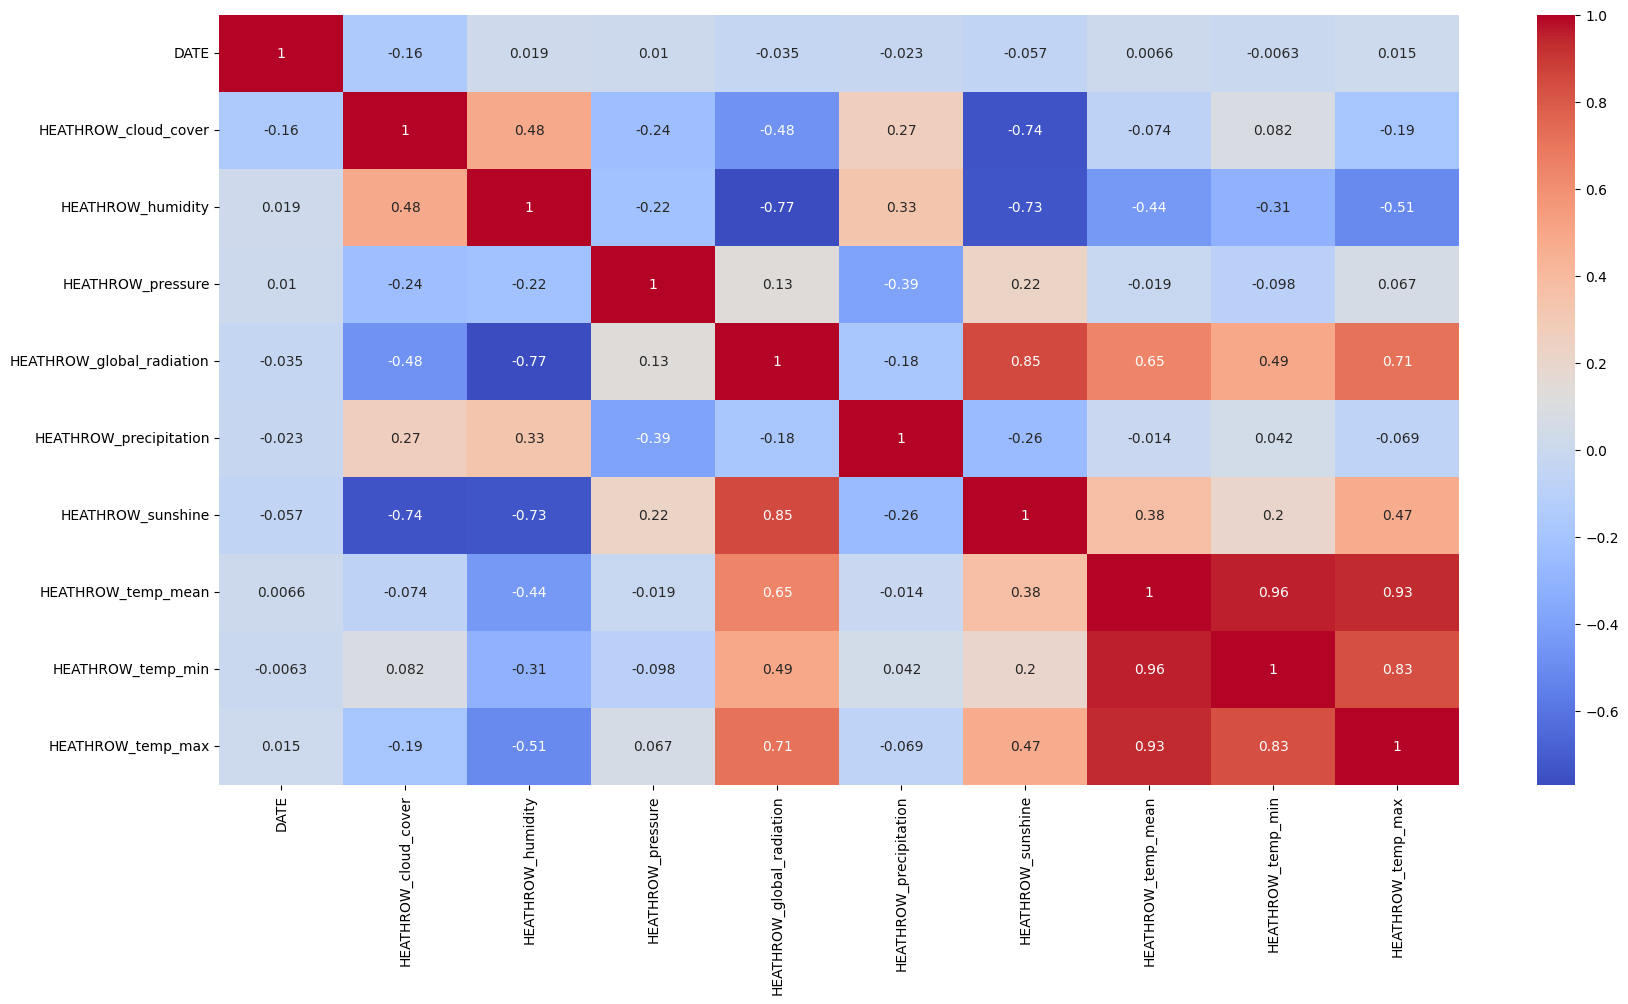

In [ ]:
plt.figure(figsize=(20,10))
corl= df_heathrow.corr(numeric_only = True)
sns.heatmap(corl,cmap="coolwarm",annot=True)
print(corl)

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

In [ ]:
weather = ['HEATHROW_cloud_cover',  'HEATHROW_humidity', 'HEATHROW_sunshine', 'HEATHROW_global_radiation']
target = ['HEATHROW_temp_mean']

In [ ]:
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

In [ ]:
df[weather] = scaler_features.fit_transform(df[weather])
df[target] = scaler_target.fit_transform(df[target])

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def create_sequences(data, time_steps, target_col_idx):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, :])
        y.append(data[i + time_steps, target_col_idx])
    return np.array(X), np.array(y)

weather = ['HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_sunshine', 'HEATHROW_global_radiation']
target = ['HEATHROW_temp_mean']

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[weather + target].values)

time_steps = 10
target_col_idx = len(weather)
X, y = create_sequences(data_scaled, time_steps, target_col_idx)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

num_features = X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], num_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], num_features))

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (2915, 10, 5)
Testing data shape: (729, 10, 5)


In [ ]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,251 (43.95 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0733 - val_loss: 0.0085
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084 - val_loss: 0.0066
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063 - val_loss: 0.0053
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057 - val_loss: 0.0046
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052 - val_loss: 0.0043
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - val_loss: 0.0041
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - val_loss: 0.0037
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0037 - val_l

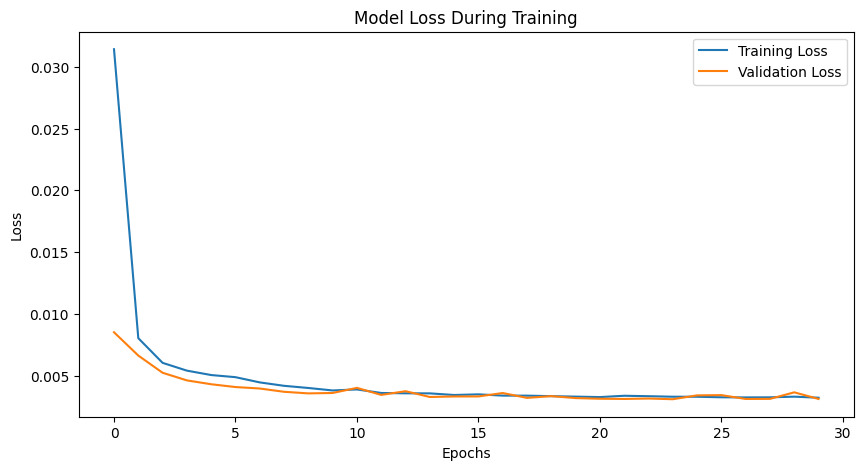

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss During Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


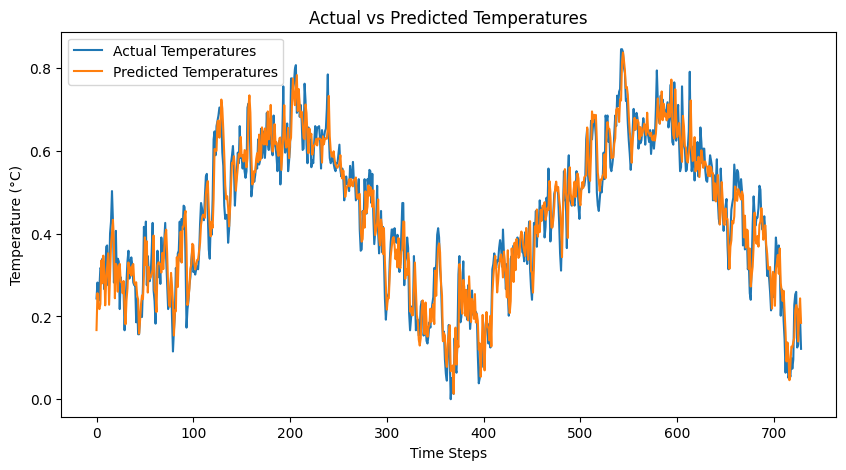

In [ ]:
y_pred = model.predict(X_test)

y_test_rescaled = scaler.inverse_transform(np.hstack([np.zeros((y_test.shape[0], len(weather))), y_test.reshape(-1, 1)]))[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.hstack([np.zeros((y_pred.shape[0], len(weather))), y_pred]))[:, -1]

plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Actual Temperatures')
plt.plot(y_pred_rescaled, label='Predicted Temperatures')
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Time Steps")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

In [ ]:
def predict_future(model, recent_data, weather_data, steps, time_steps, num_features):
    future_predictions = []
    current_sequence = recent_data.copy()

    for step in range(steps):
        next_value = model.predict(current_sequence.reshape(1, time_steps, num_features), verbose=0)
        future_predictions.append(next_value.flatten()[0])
        if step < len(weather_data):
            next_weather_row = weather_data[step].reshape(1, -1)
        else:
            next_weather_row = np.zeros((1, num_features - 1))
        predicted_row = np.hstack([next_weather_row, next_value])
        current_sequence = np.append(current_sequence[1:], predicted_row.reshape(1, -1), axis=0)

    return np.array(future_predictions)

In [ ]:
# Generate fake future data for prediction (based on previous data)
future_weather_data = np.random.rand(30, len(weather))
future_weather_data_scaled = scaler.transform(np.hstack([future_weather_data, np.zeros((future_weather_data.shape[0], 1))]))[:, :-1]

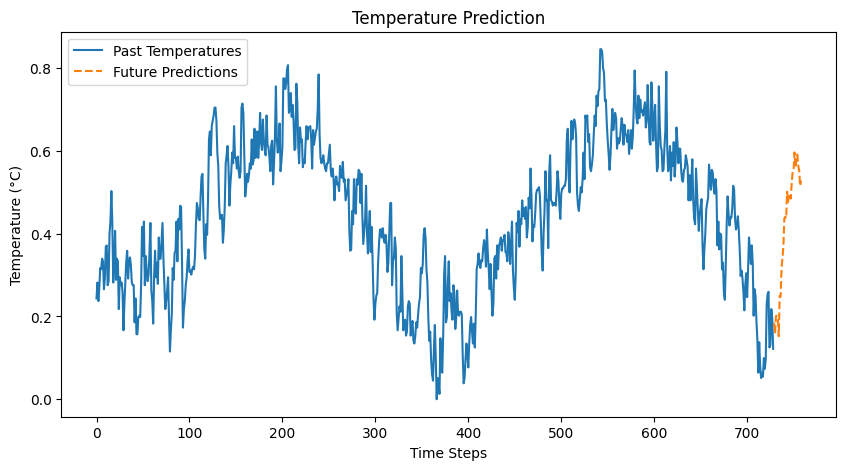

In [ ]:
recent_data = X_test[-1]
future_steps = 30

future_predictions = predict_future(model, recent_data, future_weather_data_scaled, future_steps, time_steps, num_features)

future_predictions_rescaled = scaler.inverse_transform(
    np.hstack([np.zeros((future_predictions.shape[0], num_features - 1)), future_predictions.reshape(-1, 1)])
)[:, -1]

plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label="Past Temperatures")
plt.plot(range(len(y_test_rescaled), len(y_test_rescaled) + future_steps),future_predictions_rescaled,label="Future Predictions",linestyle='--')
plt.title("Temperature Prediction")
plt.xlabel("Time Steps")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

In [ ]:
pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner
import keras

In [ ]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
tuner.search(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
print(best_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10, 16)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10, 1)               │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
best_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0343 - val_loss: 0.0360
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0343 - val_loss: 0.0357
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0329 - val_loss: 0.0343
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0325 - val_loss: 0.0334
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0332 - val_loss: 0.0336
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0332 - val_loss: 0.0339
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0315 - val_loss: 0.0336
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 - val_loss: 0.0326
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0340 - val_loss: 0.0326
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0331 - val_loss: 0.0316
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0316 - val_loss: 0.0315
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0323 - val_lo

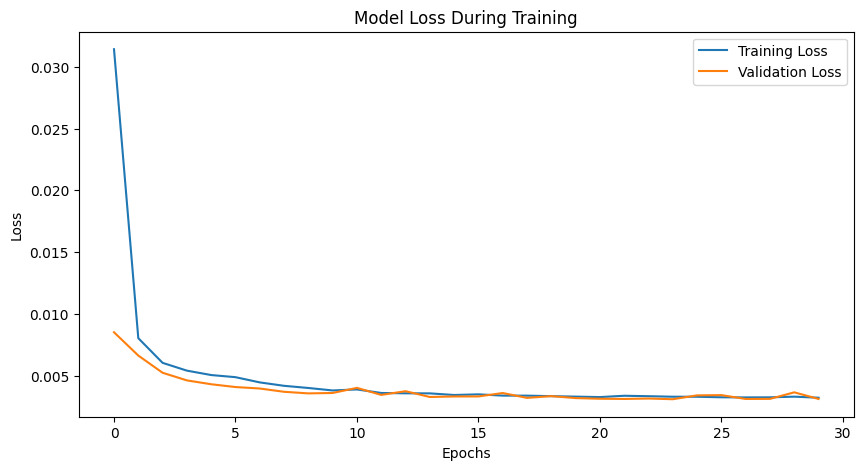

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss During Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


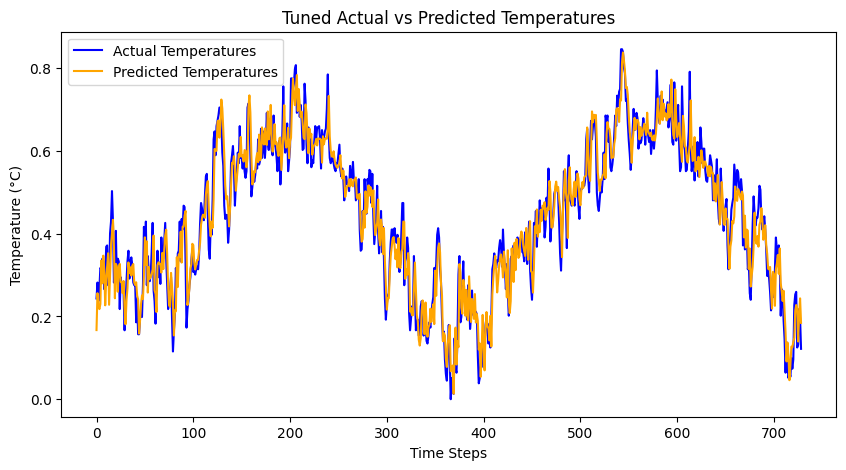

In [ ]:
y_pred = best_model.predict(X_test)

y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Actual Temperatures', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Temperatures', color='orange')
plt.title("Tuned Actual vs Predicted Temperatures")
plt.xlabel("Time Steps")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

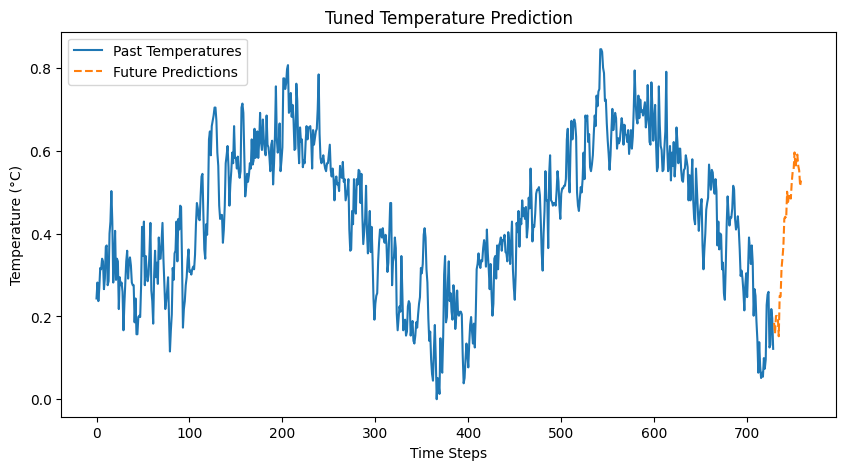

In [ ]:
def predict_future(best_model, recent_data, weather_data, steps, time_steps, num_features):
    future_predictions = []
    current_sequence = recent_data.copy()

    for step in range(steps):
        next_value = best_model.predict(current_sequence.reshape(1, time_steps, num_features), verbose=0)
        future_predictions.append(next_value.flatten()[0])
        if step < len(weather_data):
            next_weather_row = weather_data[step].reshape(1, -1)
        else:
            next_weather_row = np.zeros((1, num_features - 1))
        predicted_row = np.hstack([next_weather_row, next_value.reshape(1, -1)])
        current_sequence = np.append(current_sequence[1:], predicted_row.reshape(1, -1), axis=0)

    return np.array(future_predictions)

plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label="Past Temperatures")
plt.plot(range(len(y_test_rescaled), len(y_test_rescaled) + future_steps),future_predictions_rescaled,label="Future Predictions",linestyle='--')
plt.title("Tuned Temperature Prediction")
plt.xlabel("Time Steps")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()